## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris


In [2]:
!ls

Book1.xlsx
CONTRIBUTING.md
LICENSE.md
Movies with ratings.xlsx
README.md
movie_data_erd.jpeg
student.ipynb
zippedData
~$Book1.xlsx


In [3]:
df_budget= pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz', compression='gzip')

In [4]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(",", "")
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace("$", "").astype(float)

In [6]:
df_budget['production_budget'] = df_budget['production_budget'].str.replace(",", "")
df_budget['production_budget'] = df_budget['production_budget'].str.replace("$", "").astype(float)

In [7]:
df_budget['Revenue_Ratio'] = (df_budget['worldwide_gross']-df_budget['production_budget'])/df_budget['production_budget']

In [8]:
df_budget.describe()

,id,production_budget,worldwide_gross,Revenue_Ratio
count,5782.000000,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,9.148746e+07,3.800161
std,28.821076,4.181208e+07,1.747200e+08,29.530282
min,1.000000,1.100000e+03,0.000000e+00,-1.000000
25%,25.000000,5.000000e+06,4.125415e+06,-0.507704
50%,50.000000,1.700000e+07,2.798445e+07,0.708310
75%,75.000000,4.000000e+07,9.764584e+07,2.758346
max,100.000000,4.250000e+08,2.776345e+09,1799.000000


In [9]:
df_budget['Ratio_Cat'] = ['Loss' if x < 0 else 'Low Profit' if x < 1 else 'Medium Profit' if x < 3 else 'high Profit' for x in df_budget['Revenue_Ratio']]

In [10]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,high Profit


In [11]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
 6   Revenue_Ratio      5782 non-null   float64
 7   Ratio_Cat          5782 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 361.5+ KB


In [12]:
df_movies = pd.read_csv(r'zippedData\tmdb.movies.csv.gz', compression='gzip')

In [13]:
df_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [15]:
df_review = pd.read_csv(r'zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')
#df_review = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin1')

In [16]:
df_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [18]:
import sqlite3

In [19]:
conn = sqlite3.connect('zippedData/im.db/im.db')

In [20]:
pd.read_sql("""
SELECT *
FROM sqlite_master

""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [21]:
df_movie_info = pd.read_csv(r'zippedData/rt.movie_info.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')


In [22]:
df_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [23]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [24]:
df_bom = pd.read_csv(r'zippedData/bom.movie_gross.csv.gz', compression='gzip')

In [25]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [26]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [27]:
pd.read_sql("""
SELECT *
FROM sqlite_master

""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [28]:
df_new= pd.read_sql("""
SELECT *
  FROM movie_basics
""", conn)

In [30]:
df_new.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
df_new= pd.read_sql("""
SELECT primary_title,original_title,runtime_minutes,averagerating
  FROM movie_basics
  JOIN movie_ratings
      USING(movie_id)
""", conn)

In [32]:
len(df_new)

73856

In [33]:
df_new.head()

,primary_title,original_title,runtime_minutes,averagerating
0,Sunghursh,Sunghursh,175.0,7.0
1,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,7.2
2,The Other Side of the Wind,The Other Side of the Wind,122.0,6.9
3,Sabse Bada Sukh,Sabse Bada Sukh,NaN,6.1
4,The Wandering Soap Opera,La Telenovela Errante,80.0,6.5


In [34]:
df_new.to_excel("Movies with ratings.xlsx") 

In [35]:
df_db= pd.read_sql("""
SELECT *
  FROM persons
""", conn)

In [36]:
df_db.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [37]:
df_dir= pd.read_sql("""
SELECT DISTINCT m.movie_id,m.primary_title,m.original_title,p.primary_name
  FROM movie_basics as m
  JOIN directors as d
      USING(movie_id)
  JOIN persons as p
      USING(person_id)
""", conn)

In [38]:
df_dir.head()

,movie_id,primary_title,original_title,primary_name
0,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Mani Kaul
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Orson Welles
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Hrishikesh Mukherjee
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,Raoul Ruiz


In [39]:
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,high Profit


In [40]:
df_new= pd.read_sql("""
SELECT primary_title,original_title,runtime_minutes,averagerating
  FROM movie_basics
  JOIN movie_ratings
      USING(movie_id)
""", conn)

In [41]:
df_new.head()

,primary_title,original_title,runtime_minutes,averagerating
0,Sunghursh,Sunghursh,175.0,7.0
1,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,7.2
2,The Other Side of the Wind,The Other Side of the Wind,122.0,6.9
3,Sabse Bada Sukh,Sabse Bada Sukh,NaN,6.1
4,The Wandering Soap Opera,La Telenovela Errante,80.0,6.5


In [42]:
merged_ratings_and_budgets = df_budget.merge(df_new, left_on='movie', right_on='primary_title', how='left')

In [43]:
merged_ratings_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat,primary_title,original_title,runtime_minutes,averagerating
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit,Avatar,Abatâ,93.0,6.1
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,6.6
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss,Dark Phoenix,Dark Phoenix,113.0,6.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,7.3
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,high Profit,NaN,NaN,NaN,NaN


In [44]:
merged_ratings_and_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6473 entries, 0 to 6472
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6473 non-null   int64  
 1   release_date       6473 non-null   object 
 2   movie              6473 non-null   object 
 3   production_budget  6473 non-null   float64
 4   domestic_gross     6473 non-null   object 
 5   worldwide_gross    6473 non-null   float64
 6   Revenue_Ratio      6473 non-null   float64
 7   Ratio_Cat          6473 non-null   object 
 8   primary_title      2875 non-null   object 
 9   original_title     2875 non-null   object 
 10  runtime_minutes    2757 non-null   float64
 11  averagerating      2875 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 657.4+ KB


In [45]:
merged_ratings_and_budgets.isna().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
Revenue_Ratio           0
Ratio_Cat               0
primary_title        3598
original_title       3598
runtime_minutes      3716
averagerating        3598
dtype: int64

In [46]:
df_clean = merged_ratings_and_budgets.dropna(subset=['averagerating'])

In [47]:
df_clean.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
Revenue_Ratio          0
Ratio_Cat              0
primary_title          0
original_title         0
runtime_minutes      118
averagerating          0
dtype: int64

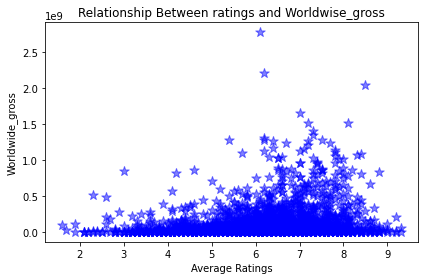

In [48]:
fig, ax = plt.subplots(figsize=(6, 4))

# These are all arguments that go in the plot's function
ax.scatter(df_clean['averagerating'], df_clean['worldwide_gross'],
           c='blue',
           alpha=0.5,
           s=100,
           marker='*')

ax.set_xlabel('Average Ratings')
ax.set_ylabel('Worldwide_gross')
ax.set_title('Relationship Between ratings and Worldwise_gross')

plt.tight_layout()


In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 6471
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2875 non-null   int64  
 1   release_date       2875 non-null   object 
 2   movie              2875 non-null   object 
 3   production_budget  2875 non-null   float64
 4   domestic_gross     2875 non-null   object 
 5   worldwide_gross    2875 non-null   float64
 6   Revenue_Ratio      2875 non-null   float64
 7   Ratio_Cat          2875 non-null   object 
 8   primary_title      2875 non-null   object 
 9   original_title     2875 non-null   object 
 10  runtime_minutes    2757 non-null   float64
 11  averagerating      2875 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 292.0+ KB


In [50]:
df_clean['worldwide_gross']

0       2.776345e+09
1       1.045664e+09
2       1.497624e+08
3       1.403014e+09
6       2.048134e+09
            ...     
6452    0.000000e+00
6458    9.459600e+04
6463    4.584000e+03
6468    0.000000e+00
6471    0.000000e+00
Name: worldwide_gross, Length: 2875, dtype: float64

In [51]:
#df_clean['worldwide_gross'] = df_clean['worldwide_gross'].str.replace(",", "")
#df_clean['worldwide_gross'] = df_clean['worldwide_gross'].str.replace("$", "").astype(float)


In [52]:
x = df_clean['averagerating'] 
y = df_clean['worldwide_gross']


r = np.corrcoef(x, y)
r

array([[1.        , 0.16567478],
       [0.16567478, 1.        ]])

In [53]:
df_dir= pd.read_sql("""
SELECT DISTINCT m.movie_id,m.primary_title as primary_title ,m.original_title,p.primary_name,p.primary_profession
  FROM movie_basics as m
  JOIN directors as d
      USING(movie_id)
  JOIN persons as p
      USING(person_id)
""", conn)

In [54]:
df_dir.head()

,movie_id,primary_title,original_title,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,Harnam Singh Rawail,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,Mani Kaul,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Orson Welles,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,Hrishikesh Mukherjee,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,Raoul Ruiz,"director,writer,producer"


In [55]:
merged_directors_and_budgets = df_budget.merge(df_dir, left_on='movie', right_on='primary_title', how='left')

In [56]:
merged_directors_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat,movie_id,primary_title,original_title,primary_name,primary_profession
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit,tt1775309,Avatar,Abatâ,Atsushi Wada,director
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,"director,miscellaneous,producer"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss,tt6565702,Dark Phoenix,Dark Phoenix,Simon Kinberg,"producer,writer,director"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,Joss Whedon,"writer,producer,director"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,high Profit,NaN,NaN,NaN,NaN,NaN


In [57]:
merged_directors_and_budgets.isna().sum()

id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
Revenue_Ratio            0
Ratio_Cat                0
movie_id              3420
primary_title         3420
original_title        3420
primary_name          3420
primary_profession    3429
dtype: int64

In [58]:
len(merged_directors_and_budgets)

7595

In [59]:
len(df_budget)

5782

In [60]:
merged_directors_and_budgets['primary_profession'].value_counts().head(20)

director,writer,producer              304
producer,director,writer              263
director,producer,writer              216
producer,writer,director              180
writer,producer,director              176
writer,director,producer              159
director                              158
director,writer,editor                130
director,writer                       114
actor,producer,director                86
actor,director,writer                  81
director,writer,cinematographer        77
director,actor,writer                  70
producer,director,actor                68
director,producer                      58
director,writer,assistant_director     52
director,writer,actor                  51
writer,director,actor                  48
director,producer,actor                46
actor,writer,director                  43
Name: primary_profession, dtype: int64

In [61]:
merged_directors_and_budgets.loc[:,'primary_profession'] = merged_directors_and_budgets.loc[:,'primary_profession'].replace({
    'director,writer,producer':'writer,director,producer',
    'producer,director,writer':'writer,director,producer',
    'director,producer,writer':'writer,director,producer',
    'producer,writer,director':'writer,director,producer',
    'writer,producer,director':'writer,director,producer',
    'producer,director,actor' :'director,producer,actor',
    'actor,producer,director' :'director,producer,actor',
    'director,actor,writer': 'writer,director,actor',
    'actor,director,writer' : 'writer,director,actor',
    'director,writer,actor' :'writer,director,actor',
    'actor,writer,director' :'writer,director,actor',
    'director,writer,editor' :'writer,director,editor',
    'actor,director,producer' : 'director,producer,actor',
    'director,editor,writer' : 'writer,director,editor',
    'producer,actor,writer': 'writer,producer,actor',
    'actor,writer,producer' : 'writer,producer,actor',
    'actor,producer,writer' : 'writer,producer,actor',
    'director,actor,producer' : 'director,producer,actor'
    
})

In [62]:
merged_directors_and_budgets.isna().sum()

id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
Revenue_Ratio            0
Ratio_Cat                0
movie_id              3420
primary_title         3420
original_title        3420
primary_name          3420
primary_profession    3429
dtype: int64

In [63]:
merged_directors_and_budgets_cleaned = merged_directors_and_budgets.dropna(subset=['primary_profession'])

In [64]:
merged_directors_and_budgets['primary_profession'].value_counts()

writer,director,producer                    1298
writer,director,actor                        293
director,producer,actor                      252
writer,director,editor                       188
director                                     158
                                            ... 
producer,camera_department,miscellaneous       1
location_management,director,writer            1
director,executive,writer                      1
writer,cinematographer,editor                  1
editorial_department,director,producer         1
Name: primary_profession, Length: 515, dtype: int64

In [65]:
merged_directors_and_budgets_cleaned.isna().sum()

id                    0
release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
Revenue_Ratio         0
Ratio_Cat             0
movie_id              0
primary_title         0
original_title        0
primary_name          0
primary_profession    0
dtype: int64

In [66]:
contingency_table=pd.crosstab(index=merged_directors_and_budgets_cleaned['primary_profession'],columns=merged_directors_and_budgets_cleaned['Ratio_Cat'])

In [67]:
stats.contingency.chi2_contingency(contingency_table)

(1631.3919822842063,
 0.055743950485759225,
 1542,
 array([[0.80652904, 0.36389822, 0.39942391, 0.43014882],
        [1.20979357, 0.54584734, 0.59913586, 0.64522324],
        [0.40326452, 0.18194911, 0.19971195, 0.21507441],
        ...,
        [0.40326452, 0.18194911, 0.19971195, 0.21507441],
        [0.40326452, 0.18194911, 0.19971195, 0.21507441],
        [0.40326452, 0.18194911, 0.19971195, 0.21507441]]))

In [151]:
merged_directors_and_budgets_cleaned = merged_directors_and_budgets_cleaned[merged_directors_and_budgets_cleaned['primary_name'].map(merged_directors_and_budgets_cleaned['primary_name'].value_counts()) > 1]

In [152]:
merged_directors_and_budgets_cleaned['primary_name'].value_counts()

Tim Story             9
David Gordon Green    8
Steven Spielberg      8
Clint Eastwood        7
Ridley Scott          7
                     ..
James Wan             4
V.K. Prakash          4
Frank Coraci          4
Rupert Wyatt          4
Brett Ratner          4
Name: primary_name, Length: 72, dtype: int64

In [139]:
contingency_table=pd.crosstab(index=merged_directors_and_budgets_cleaned['primary_name'],columns=merged_directors_and_budgets_cleaned['Ratio_Cat'])
contingency_table

Ratio_Cat,Loss,Low Profit,Medium Profit,high Profit
primary_name,,,,
Adam McKay,0,2,1,1
Antoine Fuqua,0,1,4,0
Anton Corbijn,1,1,2,0
Baltasar Kormákur,0,1,3,0
Brad Peyton,0,2,1,2
...,...,...,...,...
Tyler Perry,0,1,3,0
V.K. Prakash,2,0,1,1
Will Gluck,0,0,1,3


In [142]:
stats.contingency.chi2_contingency(contingency_table)

(248.6350266648929,
 0.047405767876896356,
 213,
 array([[0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.84070796, 0.98820059, 1.6519174 , 1.51917404],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.84070796, 0.98820059, 1.6519174 , 1.51917404],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [1.17699115, 1.38348083, 2.31268437, 2.12684366],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.67256637, 0.79056047, 1.32153392, 1.21533923],
        [0.84070796, 0.98820059, 1.6519174 , 1.51917404],
        [0.84070796, 0.98820059, 1.6519174 , 1.51917404],
        [1.34513274, 1.58112094, 2.64306785, 2.43067847],
        [0.84070796, 0.

In [141]:
merged_budgets_and_act_filter.sort_values(by=['worldwide_gross'],ascending=False)

,worldwide_gross
characters,
"[""Ida Strauss""]",2.208208e+09
"[""Isador Strauss""]",2.208208e+09
"[""Molly Brown""]",2.208208e+09
"[""First Officer Murdock""]",2.208208e+09
"[""Suffi""]",2.208208e+09
...,...
"[""Tommy Tatapolous""]",0.000000e+00
"[""Jody""]",0.000000e+00
"[""Jocelyn""]",0.000000e+00


In [73]:
merged_directors_and_budgets_filter = merged_directors_and_budgets.groupby(merged_directors_and_budgets['primary_profession']).mean()

In [74]:
merged_directors_and_budgets_filter.head()

,id,production_budget,worldwide_gross,Revenue_Ratio
primary_profession,,,,
"actor,animation_department,art_department",43.0,1.327500e+08,3.040818e+08,1.648983
"actor,animation_department,director",34.0,7.733333e+07,2.254657e+08,1.170233
"actor,art_department,director",15.0,2.600000e+08,5.864772e+08,1.255682
"actor,assistant_director,director",78.5,9.162500e+07,4.421323e+08,3.260584
"actor,camera_department,director",22.5,1.645000e+07,5.048764e+07,1.386045


In [75]:
merged_directors_and_budgets_filter.sort_values(by=['worldwide_gross'],ascending=False)

,id,production_budget,worldwide_gross,Revenue_Ratio
primary_profession,,,,
"actor,camera_department,miscellaneous",43.0,200000000.0,2.208208e+09,10.041042
"animation_department,art_department,production_designer",30.0,75000000.0,1.034728e+09,12.796370
"animation_department,actor,writer",46.0,200000000.0,1.021215e+09,4.106076
"animation_department,production_designer,director",26.0,75000000.0,8.867505e+08,10.823340
"art_department,animation_department,miscellaneous",98.0,175000000.0,8.542360e+08,3.881349
...,...,...,...,...
"location_management,director,writer",2.0,650000.0,0.000000e+00,-1.000000
"editorial_department,camera_department,producer",54.0,18000000.0,0.000000e+00,-1.000000
"editor,writer,cinematographer",42.0,200000.0,0.000000e+00,-1.000000


In [76]:
merged_directors_and_budgets_filter = merged_directors_and_budgets.groupby(merged_directors_and_budgets['primary_name']).mean()

In [77]:
merged_directors_and_budgets_filter.sort_values(by=['worldwide_gross'],ascending=False)

,id,production_budget,worldwide_gross,Revenue_Ratio
primary_name,,,,
Atsushi Wada,1.000000,425000000.0,2.776345e+09,5.532577
Ravi Punj,43.000000,200000000.0,2.208208e+09,10.041042
Kevin Lincoln,43.000000,200000000.0,2.208208e+09,10.041042
Pete Meads,43.000000,200000000.0,2.208208e+09,10.041042
Joe Russo,13.333333,240000000.0,1.300869e+09,4.196585
...,...,...,...,...
Jerome Elston Scott,65.000000,300000.0,0.000000e+00,-1.000000
Brian Stanley Allen,30.000000,29000000.0,0.000000e+00,-1.000000
Brian Trenchard-Smith,54.000000,12000000.0,0.000000e+00,-1.000000


In [78]:
df_act= pd.read_sql("""
SELECT *
  FROM movie_basics as m
  JOIN principals as p
      USING(movie_id)
""", conn)

In [79]:
df_act = df_act.dropna(subset=['characters'])

In [80]:
df_act.isna().sum()

movie_id                0
primary_title           0
original_title          0
start_year              0
runtime_minutes     77322
genres               7305
ordering                0
person_id               0
category                0
job                393360
characters              0
dtype: int64

In [81]:
df_act.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,person_id,category,job,characters
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,nm0474801,actor,None,"[""Kundan S. Prasad"",""Bajrangi""]"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2,nm0904537,actress,None,"[""Munni"",""Laila-E-Aasmaan""]"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,nm0756379,actor,None,"[""Ganeshi N. Prasad""]"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4,nm0474876,actor,None,"[""Dwarka N. Prasad""]"
11,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",2,nm0451809,actor,None,"[""Kalidasa""]"


In [82]:
merged_budgets_and_act = df_act.merge(df_budget, left_on='primary_title', right_on='movie', how='inner')

In [83]:
merged_budgets_and_act.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,person_id,category,job,characters,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1,nm0240381,actress,None,"[""Sunshine Goodness""]",26,"Dec 31, 2012",Foodfight!,45000000.0,$0,73706.0,-0.998362,Loss
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",2,nm0240380,actress,None,"[""Sweetcakes""]",26,"Dec 31, 2012",Foodfight!,45000000.0,$0,73706.0,-0.998362,Loss
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",3,nm0000221,actor,None,"[""Dex Dogtective""]",26,"Dec 31, 2012",Foodfight!,45000000.0,$0,73706.0,-0.998362,Loss
3,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",4,nm0519456,actress,None,"[""Lady X""]",26,"Dec 31, 2012",Foodfight!,45000000.0,$0,73706.0,-0.998362,Loss
4,tt0326592,The Overnight,The Overnight,2010,88.0,None,1,nm1211335,actor,None,"[""Ted Bell""]",21,"Jun 19, 2015",The Overnight,200000.0,"$1,109,808",1165996.0,4.829980,high Profit


In [84]:
merged_budgets_and_act_filter = merged_budgets_and_act[['characters','worldwide_gross']]

In [85]:
merged_budgets_and_act_filter = merged_budgets_and_act_filter.groupby(merged_budgets_and_act_filter['characters']).mean()

In [86]:
merged_budgets_and_act_filter.sort_values(by=['worldwide_gross'],ascending=False)

,worldwide_gross
characters,
"[""Ida Strauss""]",2.208208e+09
"[""Isador Strauss""]",2.208208e+09
"[""Molly Brown""]",2.208208e+09
"[""First Officer Murdock""]",2.208208e+09
"[""Suffi""]",2.208208e+09
...,...
"[""Tommy Tatapolous""]",0.000000e+00
"[""Jody""]",0.000000e+00
"[""Jocelyn""]",0.000000e+00


In [87]:
df_test= pd.read_sql("""
SELECT *
  FROM principals as pr
  JOIN persons as p
      USING(person_id)
    JOIN movie_basics as m
        USING('movie_id')
    JOIN movie_ratings as mr
        USING('movie_id')
""", conn)

In [88]:
df_test.head()

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,None,None,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
1,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
2,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
3,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328
4,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328


In [89]:
df_test2= pd.read_sql("""
SELECT *
  FROM principals
      
""", conn)

In [90]:
df_test2.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [91]:
df_movie_basic= pd.read_sql("""
SELECT *
  FROM movie_basics
      
""", conn)

In [92]:
df_movie_basic.shape

(146144, 6)

In [93]:
df_movie_basic['genres'].value_counts().head(10)

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

In [94]:
df_movie_basic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [95]:
merged_budgets_and_movie_basic = df_movie_basic.merge(df_budget, left_on='primary_title', right_on='movie', how='inner')

In [96]:
merged_budgets_and_movie_basic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,$0,73706.0,-0.998362,Loss
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,20000000.0,"$70,433,227",122133227.0,5.106661,high Profit
2,tt0326592,The Overnight,The Overnight,2010,88.0,None,21,"Jun 19, 2015",The Overnight,200000.0,"$1,109,808",1165996.0,4.829980,high Profit
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,"$1,109,808",1165996.0,4.829980,high Profit
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,-0.627468,Loss


In [97]:
merged_budgets_and_movie_basic.isna().sum()

movie_id               0
primary_title          0
original_title         1
start_year             0
runtime_minutes      487
genres                72
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
Revenue_Ratio          0
Ratio_Cat              0
dtype: int64

In [98]:
merged_budgets_and_movie_basic = merged_budgets_and_movie_basic.dropna(subset=['genres'])

In [99]:
merged_budgets_and_movie_basic.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes      434
genres                 0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
Revenue_Ratio          0
Ratio_Cat              0
dtype: int64

In [100]:
merged_budgets_and_movie_basic.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000.0,$0,73706.0,-0.998362,Loss
1,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",Mortal Kombat,20000000.0,"$70,433,227",122133227.0,5.106661,high Profit
3,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",21,"Jun 19, 2015",The Overnight,200000.0,"$1,109,808",1165996.0,4.829980,high Profit
4,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,-0.627468,Loss
5,tt2404548,On the Road,On the Road,2011,90.0,Drama,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9313302.0,-0.627468,Loss


In [101]:
contingency_table=pd.crosstab(index=merged_budgets_and_movie_basic["genres"],columns=merged_budgets_and_movie_basic["Ratio_Cat"])

In [102]:
contingency_table

Ratio_Cat,Loss,Low Profit,Medium Profit,high Profit
genres,,,,
Action,21,11,5,9
"Action,Adventure",2,1,2,1
"Action,Adventure,Animation",1,3,5,8
"Action,Adventure,Biography",1,2,2,0
"Action,Adventure,Comedy",10,3,9,11
...,...,...,...,...
"Sci-Fi,Thriller",3,1,2,2
Sport,2,1,0,0
Thriller,38,17,12,14


In [103]:
stats.contingency.chi2_contingency(contingency_table)

(1288.6980150823767,
 7.431938546370244e-08,
 1032,
 array([[18.79080951,  8.22174726,  9.20491584,  9.78252738],
        [ 2.45097515,  1.07240182,  1.2006412 ,  1.27598183],
        [ 6.9444296 ,  3.03847181,  3.40181672,  3.61528186],
        ...,
        [33.08816457, 14.47742453, 16.20865616, 17.22575474],
        [ 1.63398344,  0.71493454,  0.80042746,  0.85065456],
        [ 3.26796687,  1.42986909,  1.60085493,  1.70130911]]))

In [104]:
merged_budgets_and_movie_basic_1 = merged_budgets_and_movie_basic.groupby(merged_budgets_and_movie_basic['genres']).mean()


In [105]:
merged_budgets_and_movie_basic_1.sort_values(by=['Revenue_Ratio'],ascending=False)

,start_year,runtime_minutes,id,production_budget,worldwide_gross,Revenue_Ratio
genres,,,,,,
"Animation,Family",2015.50,58.000,54.500000,3244000.0,9.246274e+07,61.138940
"Drama,Family,Fantasy",2015.00,105.000,44.500000,48950000.0,3.990714e+08,47.260224
"Action,History,War",2012.00,NaN,53.333333,47500000.0,1.435970e+08,29.851850
"Action,Comedy,Drama",2013.25,104.125,40.000000,14737500.0,7.451666e+07,29.045600
"Horror,Romance,Thriller",2013.00,85.000,91.000000,3500000.0,9.512734e+07,26.179241
...,...,...,...,...,...,...
"Documentary,Drama,Reality-TV",2016.00,80.000,22.000000,1000000.0,0.000000e+00,-1.000000
"Documentary,Horror",2011.00,52.000,96.000000,700000.0,0.000000e+00,-1.000000
"Horror,Musical",2016.00,97.000,87.000000,500000.0,0.000000e+00,-1.000000


In [106]:
df_runtime = pd.read_sql("""
SELECT *
  FROM movie_basics
      
""", conn)

In [107]:
df_runtime.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [108]:
df_runtime['Runtime_cat'] = ['Extremly short Movie' if x < 20 else 'Short Movie' if x < 90 else 'Average Movie' if x < 120 else 'Long Movie' for x in df_runtime['runtime_minutes'] ]

In [109]:
df_runtime.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Long Movie
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Average Movie
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Long Movie
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Long Movie
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Short Movie


In [110]:
merged_runtime_and_budgets = df_budget.merge(df_runtime, left_on='movie', right_on='primary_title', how='left')

In [111]:
merged_runtime_and_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,5.532577,high Profit,tt1775309,Avatar,Abatâ,2011.0,93.0,Horror,Average Movie
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,1.546673,Medium Profit,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Long Movie
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,-0.572108,Loss,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Average Movie
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,3.243841,high Profit,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",Long Movie
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,3.153696,high Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
merged_runtime_and_budgets['Runtime_cat'].value_counts()

Average Movie           1808
Long Movie              1010
Short Movie              919
Extremly short Movie      78
Name: Runtime_cat, dtype: int64

In [113]:
merged_runtime_and_budgets = merged_runtime_and_budgets.loc[merged_runtime_and_budgets['runtime_minutes']>20]

In [114]:
df_runtime.loc[df_runtime['primary_title'] == 'Home']
                                                    

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Runtime_cat
27295,tt2075392,Home,Yurt,2011,76.0,Drama,Short Movie
27922,tt2089701,Home,Home,2011,7.0,"Documentary,Drama,Family",Extremly short Movie
28069,tt2093100,Home,Dom,2011,127.0,Drama,Long Movie
32554,tt2224026,Home,Home,2015,94.0,"Adventure,Animation,Comedy",Average Movie
38079,tt2372760,Home,Hemma,2013,90.0,"Drama,Romance",Average Movie
38947,tt2393825,Home,Home,2013,112.0,Drama,Average Movie
42535,tt2545384,Home,Home,2016,87.0,"Drama,Horror,Thriller",Short Movie
44656,tt2650038,Home,Home,2012,3.0,"Biography,Documentary",Extremly short Movie
47561,tt2821866,Home,Home,2013,92.0,Drama,Average Movie
56247,tt3289416,Home,Dom tsah,2012,26.0,"Documentary,History",Short Movie


In [115]:
df_budget.loc[df_budget['movie'] == 'Home']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue_Ratio,Ratio_Cat
243,44,"Mar 27, 2015",Home,130000000.0,"$177,397,510",385997896.0,1.969215,Medium Profit
3455,56,"Jun 5, 2009",Home,12000000.0,$0,0.0,-1.000000,Loss
5459,60,"Apr 23, 2009",Home,500000.0,"$15,433",44793168.0,88.586336,high Profit


In [116]:
contingency_table=pd.crosstab(index=merged_runtime_and_budgets["Runtime_cat"],columns=merged_runtime_and_budgets["Ratio_Cat"])
contingency_table

Ratio_Cat,Loss,Low Profit,Medium Profit,high Profit
Runtime_cat,,,,
Average Movie,713,331,392,372
Long Movie,148,97,135,143
Short Movie,424,161,134,197


In [117]:
stats.contingency.chi2_contingency(contingency_table)

(60.024898518759095,
 4.448897070143954e-11,
 6,
 array([[715.51586079, 327.96797043, 368.05913151, 396.45703727],
        [206.97720973,  94.87126578, 106.4684324 , 114.68309209],
        [362.50692947, 166.16076378, 186.47243609, 200.85987065]]))

In [118]:
merged_runtime_and_budgets.groupby('Runtime_cat').mean()

,id,production_budget,worldwide_gross,Revenue_Ratio,start_year,runtime_minutes
Runtime_cat,,,,,,
Average Movie,51.943031,3.111749e+07,8.846894e+07,2.363440,2013.930310,102.110066
Long Movie,48.336520,5.842076e+07,1.949257e+08,3.747097,2014.426386,135.562141
Short Movie,49.338428,2.350187e+07,6.127619e+07,4.634141,2014.141921,73.401747
